# Project: Investigate a Dataset (GDP Per Capita in Different Regions !)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction <a id='intro'></a>

**Dataset**: *gapminder*, For this project I chose 4 different indicators to work with:
1. Babies per woman (total Fertility rate).
2. Human Development index: which ranks countries by the level of human development based on health, education and living standards.
3. Internet Users: the percentage of internet users in the country in a specific year.
4. OWID education index: Education index based on average years of schooling.

**Dependent Varaible**: Income per person (GDP / capita, PPP\$ inflation-adjusted)
- The data is adjusted for different countries and in international dollars

#### Definitions
- GDP (Gross Domestic Product): "market value of all the finished goods and services produced within a country's borders in a specific time period". [src](https://www.investopedia.com/terms/g/gdp.asp)
- GDP / Capita: "a measure of a country's economic output that accounts for its number of people. It divides the country's gross domestic product by its total population" [src](https://www.thebalance.com/gdp-per-capita-formula-u-s-compared-to-highest-and-lowest-3305848#:~:text=The%20gross%20domestic%20product%20per,product%20by%20its%20total%20population.)





*for the data sources and more info -> [data](https://www.gapminder.org/data)

## Questions
#### 1. Which countries have developed the most (GDP / Capita) in the choosen time period (2000 - 2017)
#### 2. What are the characteristics of these countries that has developed the most in the time period? 
#### 3. Do these countries have higher educational index or other index because they have a higher GDP/Capita or they have a higher GDP/Capita because they have a higher educational index?

In [1]:
# importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# setting matplotlib style
plt.style.use('seaborn-whitegrid')

In [2]:
# loading the data in the correct format
def read_csv(csv=None):
    # getting the dataset and transposing it
    df = pd.read_csv(f'data/{csv}', index_col=0, header=None).T
    # fixing the columns naming after transposing
    df.rename(columns={'country': 'year'}, inplace=True)
    # Making sure that the year column is in int format
    df['year'] = df['year'].astype(int)
    print(f"Starting Year: {df['year'].min()} | Ending Year: {df['year'].max()}")
    return df

- The function loads the data and then transpose it to be in the right format where the year and countries are the columns and the data items are the rows.
- The function also prints the starting and ending of the indicator dataframe.
- The function also makes sure that the `year` feature is in the right format as `int`.

## Data Wrangling <a id='wrangling'></a>

### General Properties

#### GDP Per Capita Dataset 

In [3]:
df_income = read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
df_income.head()

Starting Year: 1800 | Ending Year: 2040


,year,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
1,1800,603,667,715,1200,618,757,1640,514,817,...,3280,1980,1810,502,585,1210,778,877,663,869
2,1801,603,667,716,1200,620,757,1640,514,822,...,3290,2020,1810,502,586,1200,778,879,665,870
3,1802,603,667,717,1200,623,757,1650,514,826,...,3300,2050,1820,502,586,1200,778,882,667,871
4,1803,603,667,718,1200,626,757,1650,514,831,...,3190,2020,1830,502,586,1190,778,884,668,872
5,1804,603,667,719,1210,628,757,1660,514,836,...,3140,2010,1840,503,586,1190,778,887,670,873


In [4]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241 entries, 1 to 241
Columns: 194 entries, year to Zimbabwe
dtypes: int64(194)
memory usage: 367.1 KB


The features are in the right format as `int`.

**According to the [dataset description](https://www.gapminder.org/data/documentation/gd001/): the dataset ends in 2018**

So we will trim the dataset to only include data up till year 2018.

In [5]:
# the dataset ends at 2018
df_income = df_income[df_income['year'] <= 2018]
df_income.tail()

,year,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
215,2014,1800,10700,13500,44900,6810,20800,18900,7950,43700,...,38400,52100,19900,5340,2840,17100,5310,3830,3690,2510
216,2015,1770,11000,13800,46600,6650,21400,19200,8170,44100,...,39000,53200,19900,5640,2740,15600,5610,3110,3680,2510
217,2016,1760,11400,13900,48200,6260,22400,18600,8160,44600,...,39400,53600,20200,5880,2780,15200,5900,2620,3700,2490
218,2017,1760,11800,13900,49800,6050,22900,18900,8750,44900,...,39900,54500,20700,6040,2830,14500,6230,2400,3720,2570
219,2018,1740,12300,13900,51500,5730,23800,18300,9180,45400,...,40200,55700,20900,6240,2850,12500,6610,2360,3740,2620


In [6]:
# missing values
df_income.isna().sum().sum()

0

In [7]:
# number of duplicates
df_income.duplicated().sum()

0

The dataset is clean and has no duplicates

#### OWID Education Index

In [8]:
df_owid = read_csv('owid_education_idx.csv')
df_owid.tail()

Starting Year: 1870 | Ending Year: 2017


,year,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
144,2013,0.233,0.647,0.520,0.68,0.327,0.613,0.653,0.760,0.840,...,0.840,0.880,0.567,0.753,0.453,0.660,0.527,0.2,0.453,0.533
145,2014,0.233,0.647,0.527,0.68,0.327,0.613,0.653,0.767,0.847,...,0.847,0.887,0.573,0.753,0.453,0.667,0.520,0.2,0.460,0.547
146,2015,0.240,0.647,0.527,0.68,0.333,0.613,0.653,0.773,0.853,...,0.853,0.887,0.580,0.760,0.453,0.673,0.533,0.2,0.460,0.547
147,2016,0.240,0.667,0.533,0.68,0.340,0.613,0.660,0.780,0.860,...,0.860,0.893,0.580,0.760,0.453,0.673,0.540,0.2,0.467,0.547
148,2017,0.253,0.667,0.533,0.68,0.340,0.613,0.660,0.780,0.860,...,0.860,0.893,0.580,0.767,0.453,0.687,0.547,0.2,0.467,0.547


In [9]:
df_owid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 1 to 148
Columns: 188 entries, year to Zimbabwe
dtypes: float64(187), int64(1)
memory usage: 218.5 KB


The features are in the right format as `float`, except for the year as `int`.

In [10]:
# total missing values per country
df_owid.isna().sum()

0
year             0
Afghanistan     96
Albania         96
Algeria         96
Andorra        130
              ... 
Venezuela       96
Vietnam        112
Yemen           96
Zambia          96
Zimbabwe        96
Length: 188, dtype: int64

In [11]:
# total missing values
df_owid.isna().sum().sum()

20087

In [12]:
# number of duplicates
df_owid.duplicated().sum()

0

The dataset seems to have **20087** missing values accross many countries. And has no duplicates.

The missing values will be delt after loading all the features.

#### Human Development Index


In [13]:
df_hid = read_csv('hdi_human_development_index.csv')
df_hid.tail()

Starting Year: 1990 | Ending Year: 2018


,year,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
25,2014,0.488,0.787,0.749,0.853,0.557,0.767,0.825,0.746,0.929,...,0.918,0.915,0.800,0.693,0.589,0.770,0.675,0.504,0.565,0.537
26,2015,0.490,0.788,0.751,0.850,0.565,0.770,0.828,0.748,0.933,...,0.916,0.917,0.802,0.696,0.592,0.763,0.680,0.493,0.570,0.544
27,2016,0.491,0.788,0.755,0.854,0.570,0.772,0.828,0.751,0.935,...,0.918,0.919,0.806,0.701,0.592,0.752,0.685,0.477,0.580,0.549
28,2017,0.493,0.789,0.758,0.852,0.576,0.774,0.832,0.758,0.937,...,0.919,0.919,0.807,0.707,0.595,0.735,0.690,0.463,0.589,0.553
29,2018,0.496,0.791,0.759,0.857,0.574,0.776,0.830,0.760,0.938,...,0.920,0.920,0.808,0.710,0.597,0.726,0.693,0.463,0.591,0.563


In [14]:
df_hid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 1 to 29
Columns: 189 entries, year to Zimbabwe
dtypes: float64(188), int64(1)
memory usage: 43.0 KB


In [15]:
# missing values per country
df_hid.isna().sum()

0
year            0
Afghanistan     0
Albania         0
Algeria         0
Andorra        10
               ..
Venezuela       0
Vietnam         0
Yemen           0
Zambia          0
Zimbabwe        0
Length: 189, dtype: int64

In [16]:
# total number of missing values
df_hid.isna().sum().sum()

517

In [17]:
df_hid.duplicated().sum()

0

The dataset seems to have **517** missing values accross the countries. And has no duplicates.

The missing values will be delt after loading all the features.

#### Internet Users 

In [18]:
df_iu = read_csv('internet_users.csv')
df_iu.tail()

Starting Year: 1960 | Ending Year: 2019


,year,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
56,2015,8.26,63.3,38.2,96.9,12.4,70.0,68.0,59.1,84.6,...,92.0,74.6,64.6,42.8,22.4,64.0,45.0,24.1,21.0,22.7
57,2016,NaN,66.4,42.9,97.9,13.0,73.0,71.0,64.3,86.5,...,94.8,85.5,66.4,46.8,24.0,60.0,53.0,24.6,25.5,23.1
58,2017,11.40,71.8,47.7,91.6,14.3,NaN,74.3,64.7,86.5,...,90.4,87.3,70.3,48.7,25.7,64.3,58.1,26.7,27.9,27.1
59,2018,NaN,NaN,49.0,NaN,NaN,NaN,NaN,68.2,NaN,...,90.7,88.5,74.4,55.2,NaN,NaN,69.8,NaN,14.3,NaN
60,2019,NaN,69.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,92.5,NaN,76.9,NaN,NaN,NaN,68.7,NaN,NaN,NaN


In [19]:
df_iu.isna().sum()

0
year            0
Afghanistan    43
Albania        35
Algeria        34
Andorra        38
               ..
Venezuela      33
Vietnam        35
Yemen          37
Zambia         34
Zimbabwe       35
Length: 195, dtype: int64

In [20]:
df_iu.isna().sum().sum()

6744

In [21]:
df_iu.duplicated().sum()

0

The dataset seems to have **6744** missing values accross the countries. And has no duplicates.

The missing values will be delt after loading all the features.

#### Babies per woman (Fertility Rate)  

In [22]:
df_fertility = read_csv('children_per_woman_total_fertility.csv')
df_fertility.head()

Starting Year: 1800 | Ending Year: 2100


,year,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
1,1800,7.0,4.6,6.99,6.93,5.00,6.8,7.80,6.50,5.1,...,4.97,7.03,5.97,5.71,6.6,5.63,4.7,6.88,6.71,6.75
2,1801,7.0,4.6,6.99,6.93,5.00,6.8,7.80,6.48,5.1,...,4.60,7.01,5.97,5.71,6.6,5.63,4.7,6.88,6.71,6.75
3,1802,7.0,4.6,6.99,6.93,4.99,6.8,7.81,6.46,5.1,...,5.30,6.99,5.96,5.71,6.6,5.64,4.7,6.88,6.71,6.75
4,1803,7.0,4.6,6.99,6.93,4.99,6.8,7.81,6.44,5.1,...,5.61,6.96,5.96,5.71,6.6,5.64,4.7,6.88,6.71,6.75
5,1804,7.0,4.6,6.99,6.93,4.99,6.8,7.81,6.42,5.1,...,5.65,6.94,5.96,5.71,6.6,5.64,4.7,6.88,6.71,6.75


In [23]:
df_fertility.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 1 to 301
Columns: 185 entries, year to Zimbabwe
dtypes: float64(184), int64(1)
memory usage: 437.4 KB


In [24]:
df_fertility.isna().sum()

0
year           0
Afghanistan    0
Albania        0
Algeria        0
Angola         0
              ..
Venezuela      0
Vietnam        0
Yemen          0
Zambia         0
Zimbabwe       0
Length: 185, dtype: int64

In [25]:
df_fertility.isna().sum().sum()

0

In [26]:
df_fertility.duplicated().sum()

0

The features are in the right format as `float`, except for the `year` as `int`.

### Making sure that we are working with the same data across all indicators
The datasets are quite different. Some datasets have more countries than others. Also some datasets has too many missing values for some time periods.

**The goal**
- Countries that are present in all of our indicators datasets (intersection)
- The time period with the least missing values

In [27]:
# getting the columns of all of the datasets
dfs_columns = [df_income.columns, df_iu.columns, df_hid.columns, df_owid.columns, df_fertility.columns]

In [28]:
for c in dfs_columns:
    print(f'Number of countries = {len(c)-1}') # we subtract 1 as the year is included in the columns

Number of countries = 193
Number of countries = 194
Number of countries = 188
Number of countries = 187
Number of countries = 184


As we can see the number of countries differe from one dataset to the other.

#### Getting the intersections between the countries
In this section we will get the countries that are present in all of the datasets we have.

We also didn't remove the `year` column as we know it's present in all of the datasets and we will need it later.

In [29]:
countries = dfs_columns[0]
intersections = 0 
for c in dfs_columns[1:]:
    countries = np.intersect1d(countries, c)
    intersections += 1
    print(f'Number of countries after intersection {intersections}: {len(countries)}')

Number of countries after intersection 1: 194
Number of countries after intersection 2: 188
Number of countries after intersection 3: 186
Number of countries after intersection 4: 181


#### Getting the data for the common countries only
Now as we have a list of the common countries in all of our datasets we can use this list to update our datasets.

In [30]:
# update the rest of the datasets 
df_income = df_income[countries]
df_iu = df_iu[countries]
df_hid = df_hid[countries]
df_owid = df_owid[countries]
df_fertility = df_fertility[countries]

In [31]:
dfs_columns = [df_income.columns, df_iu.columns, df_hid.columns, df_owid.columns, df_fertility.columns]
for c in dfs_columns:
    print(f'Number of countries = {len(c)-1}')

Number of countries = 180
Number of countries = 180
Number of countries = 180
Number of countries = 180
Number of countries = 180


Now all of our datasets have the same set of countries

### Choosing the time period with the lowest number of null values
as some of the datasets have a high number of null values, we will need to find the time period with the lowest number of nulls accorss all datasets.

some datasets have a high number of nulls specifically in the early years because of data collection reasons we will discuss it later on.

In [32]:
# counting the number of nulls in each year in a dataset
def null_per_year(df):
    nulls = {}
    for y in df['year']:
        n_nulls = df[df['year'] == y].isna().sum().sum()
        if n_nulls > 0:
            nulls[y] = n_nulls
    
    return pd.Series(nulls).to_frame('nulls')

In [33]:
# making a dictionary of the datasets for faster iterating 
dfs = {'Income': df_income, 'Interent Use': df_iu, 'Human Development Index': df_hid, 'Education Index': df_owid, 'Fertility': df_fertility}

In [34]:
null_dfs = []
print('-'*5, 'Dataframes with nulls!', '-'*5)
for df in dfs:
    n_nulls = dfs[df].isna().sum().sum()
    if n_nulls > 0:
        print(f"Numer of Nulls in {df}: {n_nulls}")
        null_dfs.append(df)

----- Dataframes with nulls! -----
Numer of Nulls in Interent Use: 6153
Numer of Nulls in Human Development Index: 415
Numer of Nulls in Education Index: 19162


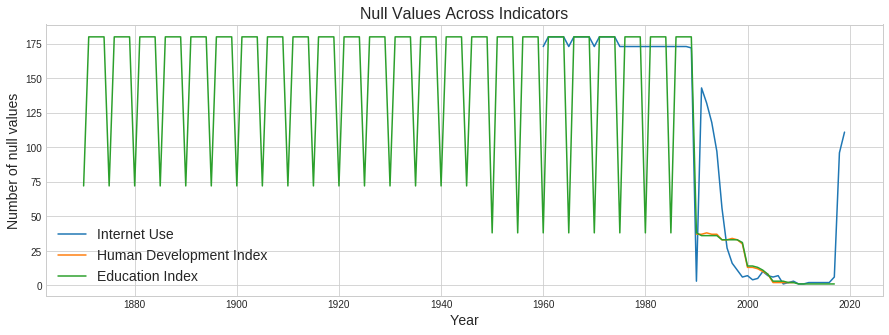

In [35]:
plt.figure(figsize=(15, 5))
for df in null_dfs:
    nulls = null_per_year(dfs[df])
    plt.plot(nulls)

plt.title('Null Values Across Indicators', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of null values', fontsize=14)
plt.legend(['Internet Use', 'Human Development Index', 'Education Index'], fontsize=14)
plt.show()

- the internet was available to the public in [**1991**](https://thenextweb.com/insider/2011/08/06/20-years-ago-today-the-world-wide-web-opened-to-the-public/#:~:text=Today%20is%20a%20significant%20day,the%20project%20on%20the%20alt.) so there's no data prior to this year in the internet use datasets and it also took the world some years until it was available to a descent amount of people.
- also the educational index data was not stable until the early **1990s**.

#### Nulls Distribution Across Indicators
- according to the above insights, we will plot the nulls distribution across years starting 1991 so we can clearly see the difference.
- and then descide on th time period we will choose

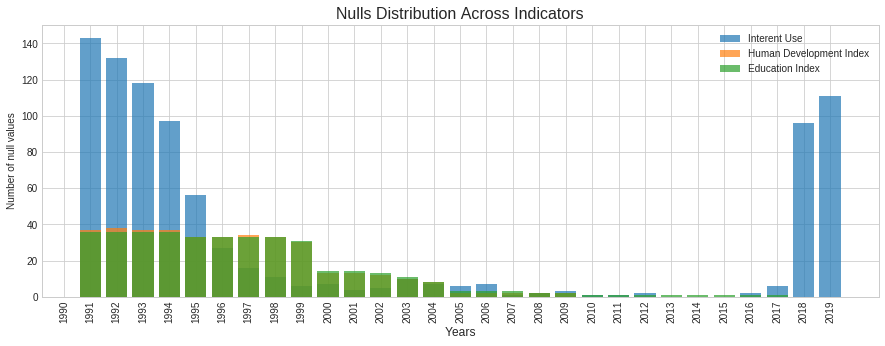

In [36]:
fig = plt.figure(figsize=(15, 5))
for df in null_dfs:
    nulls = null_per_year(dfs[df]).loc[1991:]
    plt.bar(nulls.index, nulls['nulls'], alpha=0.7)

plt.title('Nulls Distribution Across Indicators', fontsize=16)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Number of null values')
plt.legend(null_dfs)
plt.xticks(np.arange(1990, 2020), rotation='vertical')
plt.show()

The time period with the lowest number of nulls will be from **2007-2016** but I choose the time period **2000-2017** as I can handle small number of missing data without affecting the results. 

In [37]:
# updating the dataframes
df_income = df_income.query('2017 >= year >= 2000')
df_iu = df_iu.query('2017 >= year >= 2000')
df_hid = df_hid.query('2017 >= year >= 2000')
df_owid = df_owid.query('2017 >= year >= 2000')
df_fertility = df_fertility.query('2017 >= year >= 2000')

Here we are updating the dataframes to only include the time period **2000-2017**

In [38]:
df_income.tail()

,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe,year
214,1810,10500,13300,6730,20100,19600,7720,43200,44300,16600,...,51200,19400,5070,2850,18000,5070,3940,3630,2490,2013
215,1800,10700,13500,6810,20800,18900,7950,43700,44200,16900,...,52100,19900,5340,2840,17100,5310,3830,3690,2510,2014
216,1770,11000,13800,6650,21400,19200,8170,44100,44300,16800,...,53200,19900,5640,2740,15600,5610,3110,3680,2510,2015
217,1760,11400,13900,6260,22400,18600,8160,44600,44700,16100,...,53600,20200,5880,2780,15200,5900,2620,3700,2490,2016
218,1760,11800,13900,6050,22900,18900,8750,44900,45500,15900,...,54500,20700,6040,2830,14500,6230,2400,3720,2570,2017


Making sure that we have the correct years -> the year column is at the end of the dataframe

In [39]:
# updating our dictionary to include the updated dataframes
dfs = {'Income': df_income, 'Interent Use': df_iu, 'Human Development Index': df_hid, 'Education Index': df_owid, 'Fertility': df_fertility}

In [40]:
for df in dfs:
    print(dfs[df].shape, 'Shape ', df)

(18, 181) Shape  Income
(18, 181) Shape  Interent Use
(18, 181) Shape  Human Development Index
(18, 181) Shape  Education Index
(18, 181) Shape  Fertility


- Now all the indicators have the same number of columns **181**: 180 country + the year column.
- All the indicators are across **18** years in the time period **2000-2017**

### Filling Missing Values
- In this section we will examine the remaining missing values and handle them
 - Dropping countries with too many missing values
 - Interpolation

In [41]:
# number of missing values per indicator
for df in dfs:
    print(' number of missing values in ', df, ' :', dfs[df].isna().sum().sum())

 number of missing values in  Income  : 0
 number of missing values in  Interent Use  : 64
 number of missing values in  Human Development Index  : 66
 number of missing values in  Education Index  : 81
 number of missing values in  Fertility  : 0


In [42]:
# the number of missing Education Index per country
df_owid.isna().sum()[df_owid.isna().sum()>0]

0
Bhutan            5
Comoros           4
Eritrea           5
Grenada           2
Guinea-Bissau     5
Lebanon           5
Montenegro        3
Nigeria           3
Palestine         4
South Korea      18
South Sudan       8
Suriname          4
Turkmenistan     10
Vanuatu           5
dtype: int64

Here we find that **Turkmenistan and South Korea** have a high number of missing values.

We will add the countries with missing values in a set as we explore the other features and then drop these countries from our datasets. 

In [43]:
# countries to drop set
drop_countries = {'Turkmenistan', 'South Korea'}

In [44]:
# the number of missing Internet users entries per country
df_iu.isna().sum()[df_iu.isna().sum()>0]

0
Afghanistan                        2
Antigua and Barbuda                1
Australia                          3
Azerbaijan                         2
Bangladesh                         1
Belarus                            3
Belize                             2
Bhutan                             1
Ecuador                            1
Eritrea                            4
Guyana                             5
Iraq                               1
Ireland                            1
Liberia                            2
Libya                              1
Madagascar                         1
Mongolia                           4
Montenegro                         4
Myanmar                            1
Pakistan                           1
Rwanda                             1
Serbia                             4
Seychelles                         1
South Sudan                       13
St. Vincent and the Grenadines     1
Sudan                              3
dtype: int64

Here we find that **South Sudan** has a high number of missing values so we add to our drop set.

In [45]:
# adding South Sudan to the drop set
drop_countries.add('South Sudan')

In [46]:
# the number of missing Human Development Index entries per country
df_hid.isna().sum()[df_hid.isna().sum()>0]

0
Antigua and Barbuda     5
Bhutan                  5
Eritrea                 5
Grenada                 2
Guinea-Bissau           5
Lebanon                 5
Montenegro              3
Nigeria                 3
Palestine               4
South Sudan            10
Suriname                4
Turkmenistan           10
Vanuatu                 5
dtype: int64

Here we find that **South Sudan and Turkmenistan** have a high number of missing values so we add to our drop set.

As we are using a **set** to store these names, it will **automatically ignore duplicates**.

In [47]:
# Adding the new countries to the drop list
drop_countries.add('South Sudan')
drop_countries.add('Turkmenistan')

In [49]:
# drop countries with very high missing values
drop_countries = list(drop_countries)
df_income.drop(drop_countries, axis=1, inplace=True)
df_iu.drop(drop_countries, axis=1, inplace=True)
df_hid.drop(drop_countries, axis=1, inplace=True)
df_owid.drop(drop_countries, axis=1, inplace=True)
df_fertility.drop(drop_countries, axis=1, inplace=True)

In [50]:
# updating our dictionary
dfs = {'Income': df_income, 'Interent Use': df_iu, 'Human Development Index': df_hid, 'Education Index': df_owid, 'Fertility': df_fertility}

In [51]:
for df in dfs:
    print(' number of missing values in ', df, ' :', dfs[df].isna().sum().sum())

 number of missing values in  Income  : 0
 number of missing values in  Interent Use  : 51
 number of missing values in  Human Development Index  : 46
 number of missing values in  Education Index  : 45
 number of missing values in  Fertility  : 0


After removing the countries with high number of missing values our numbers changed as follows:
- Internet Use: 64 -> 51
- Human Development Index 66 -> 46
- Education Index -> 81 -> 45

We can now fill these missing values using pandas **interpolation**.

#### Filling Missing Values using Interpolation
- As our data seems to follow a trend as it increases or decrease overtime filling it the mean or median won't be the best choice 
- So I will be filling the missing data using **Interpolation**
 - The `limit_direction` is set to `both` so the algorithm doesn't leave any empty values even if they are at the start or the end of the dataframe.

In [52]:
# filling missing values with interpolation
df_iu = df_iu.interpolate(method='linear', limit_direction='both')
df_hid = df_hid.interpolate(method='linear', limit_direction='both')
df_owid = df_owid.interpolate(method='linear', limit_direction='both')

In [53]:
# updating the dictionary
dfs = {'Income': df_income, 'Interent Use': df_iu, 'Human Development Index': df_hid, 'Education Index': df_owid, 'Fertility': df_fertility}

In [54]:
for df in dfs:
    print(' number of missing values in ', df, ' :', dfs[df].isna().sum().sum())

 number of missing values in  Income  : 0
 number of missing values in  Interent Use  : 0
 number of missing values in  Human Development Index  : 0
 number of missing values in  Education Index  : 0
 number of missing values in  Fertility  : 0


Now we have no missing values in any of our dataframes and we are ready for the next step

## Exploratory Data Analysis <a id='eda'></a>

### 1. Which countries have developed the most (GDP / Capita) in the choosen time period (2000 - 2017)

In [55]:
# getting the difference between the income the first and last years
df_countries_difference = pd.DataFrame(df_income.iloc[-1, :] - df_income.iloc[0, :],columns=['difference'])
df_countries_difference.drop('year', axis=0, inplace=True) # dropping the year
df_countries_difference.tail()

,difference
0,
Venezuela,-100
Vietnam,3660
Yemen,-1600
Zambia,1590
Zimbabwe,-380


Now we have a dataframe of how much each country's GDP/Capita has changed from the first year in the time period to the last year.

We can sort them and get the **top 10 countries that developed the most in the time period**.

In [91]:
most_advancing_10 = df_countries_difference.sort_values('difference', ascending=False).iloc[:10]
most_advancing_10

,difference
0,
Singapore,35400
Ireland,27200
Lithuania,17400
Slovak Republic,14500
Estonia,14200
Kazakhstan,14150
Latvia,13800
Romania,13000
Iceland,12800


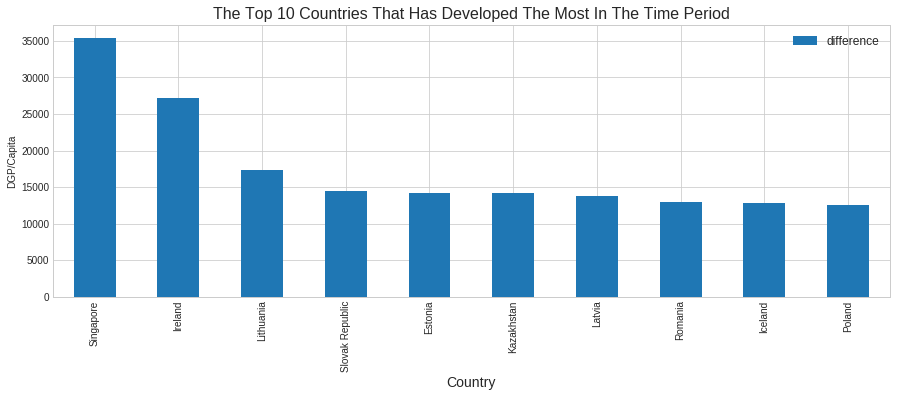

In [92]:
# plotting the top 10 countries
most_advancing_10.plot(kind='bar', figsize=(15, 5))
plt.title('The Top 10 Countries That Has Developed The Most In The Time Period', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('DGP/Capita')
plt.legend(fontsize=12)
plt.show()

**So these are the top 10 advancing countries in the time period. We can add more data like at what GDP/Capita these countries started and ended.**

In [93]:
# adding the start and end GDP/Capita for each country
start = []
end = []
for country in most_advancing_10.index:
    start.append(df_income[country].iloc[0])
    end.append(df_income[country].iloc[-1])

In [94]:
most_advancing_10['start'] = start
most_advancing_10['end'] = end

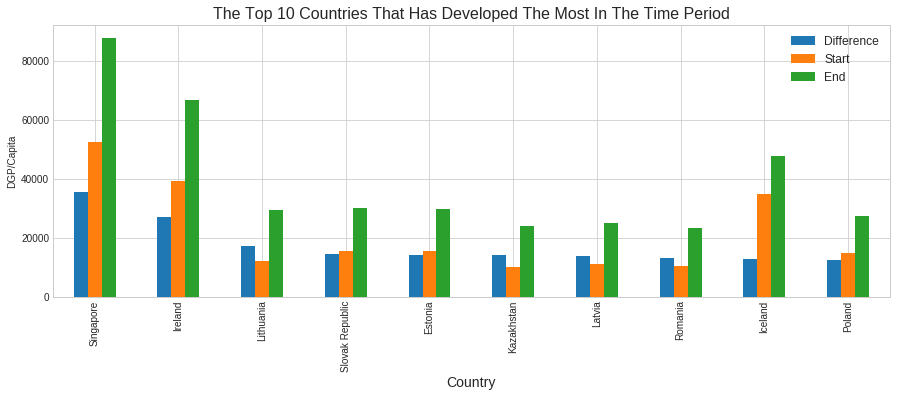

In [95]:
# plotting the top 10 countries
most_advancing_10.plot(kind='bar', figsize=(15, 5))
plt.title('The Top 10 Countries That Has Developed The Most In The Time Period', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('DGP/Capita')
plt.legend(['Difference', 'Start', 'End'], fontsize=12)
plt.show()

Here we can clearly see that some countries already started with a higher GDP/Capita like **Singapore and Ireland**. But they still manage to make a big change. Although some other countries had a small start they still made a big difference and outperformed countries like **Iceland** which had a higher start than countries like **Romania, Latvia, Kazakhstan, Estonia, Slovak Republic and Lithuania** but they made higher difference. 

In [97]:
# calculating the change 
most_advancing_10['change %'] = most_advancing_10['difference']/ most_advancing_10['end']
most_advancing_10['change %']

0
Singapore          0.403189
Ireland            0.408408
Lithuania          0.587838
Slovak Republic    0.481728
Estonia            0.474916
Kazakhstan         0.587137
Latvia             0.552000
Romania            0.555556
Iceland            0.267782
Poland             0.461538
Name: change %, dtype: float64

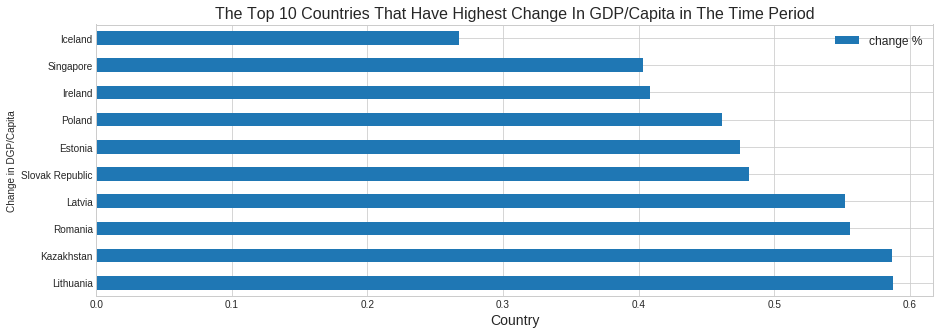

In [266]:
# plotting the top 10 countries
most_advancing_10['change %'].sort_values(ascending=False).plot(kind='barh', figsize=(15, 5))
plt.title('The Top 10 Countries That Have Highest Change In GDP/Capita in The Time Period', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Change in DGP/Capita')
plt.legend(fontsize=12)
plt.show()

Here the change is more clear and we can see that although **Singapore** had the highest difference, it didn't have the highest change as it already started at a higher GDP/Capita. 

We can also see the countries with the highest change are **Lithuania and Kazakhstan**.

### 2. What are the characteristics of these countries that has developed the most in the time period? 

In [123]:
def plot_features(df):
    
    # making the subplots
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    
    fig.suptitle('The Characteristics of the Most Advancing Countries (2000-2017)', fontsize=16)
    
    # Plotting Internet Use data
    for c in df.index:
        axs[0][0].plot(df_iu['year'], df_iu[c].values)

    axs[0][0].legend(df.index, title='Country', bbox_to_anchor=(-.35, 1), loc='upper left')
    axs[0][0].set_title('Internet Users in the Country', fontsize=14)
    axs[0][0].set_ylabel('% of People', fontsize=12)
    axs[0][0].set_xticks(df_iu['year'].values)
    axs[0][0].tick_params(labelrotation=45)

    # Plotting Human Development Index data
    for c in df.index:
        axs[0][1].plot(df_hid['year'], df_hid[c].values)

    axs[0][1].legend(df.index, title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
    axs[0][1].set_title('Human Development Index in the Country', fontsize=14)
    axs[0][1].set_ylabel('Index Score', fontsize=12)
    axs[0][1].set_xticks(df_hid['year'].values)
    axs[0][1].tick_params(labelrotation=45)
    
    
    # Plotting the Education Index data
    for c in df.index:
        axs[1][0].plot(df_owid['year'], df_owid[c].values)

    axs[1][0].legend(df.index, title='Country', bbox_to_anchor=(-.35, 1), loc='upper left')
    axs[1][0].set_title('Education Index in the Country', fontsize=14)
    axs[1][0].set_xlabel('Years', fontsize=12)
    axs[1][0].set_ylabel('Index Score', fontsize=12)
    axs[1][0].set_xticks(df_owid['year'].values)
    axs[1][0].tick_params(labelrotation=45)
    
    # Plotting the Fertility data
    for c in df.index:
        axs[1][1].plot(df_fertility['year'], df_fertility[c].values)
        
    axs[1][1].legend(df.index, title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
    axs[1][1].set_title('Babies per Woman in the Country', fontsize=14)
    axs[1][1].set_xlabel('Years', fontsize=12)
    axs[1][1].set_ylabel('Number of Babies', fontsize=12)
    axs[1][1].set_xticks(df_fertility['year'].values)
    axs[1][1].tick_params(labelrotation=45)
    
    #fig.tight_layout()
    plt.show()

The function takes a dataframe where the index of the dataframe is the names of the countries and then makes a subplot of the 4 indicators we have (Internet Use, Human Development Index, Education Index, Fertility rating) across the years.

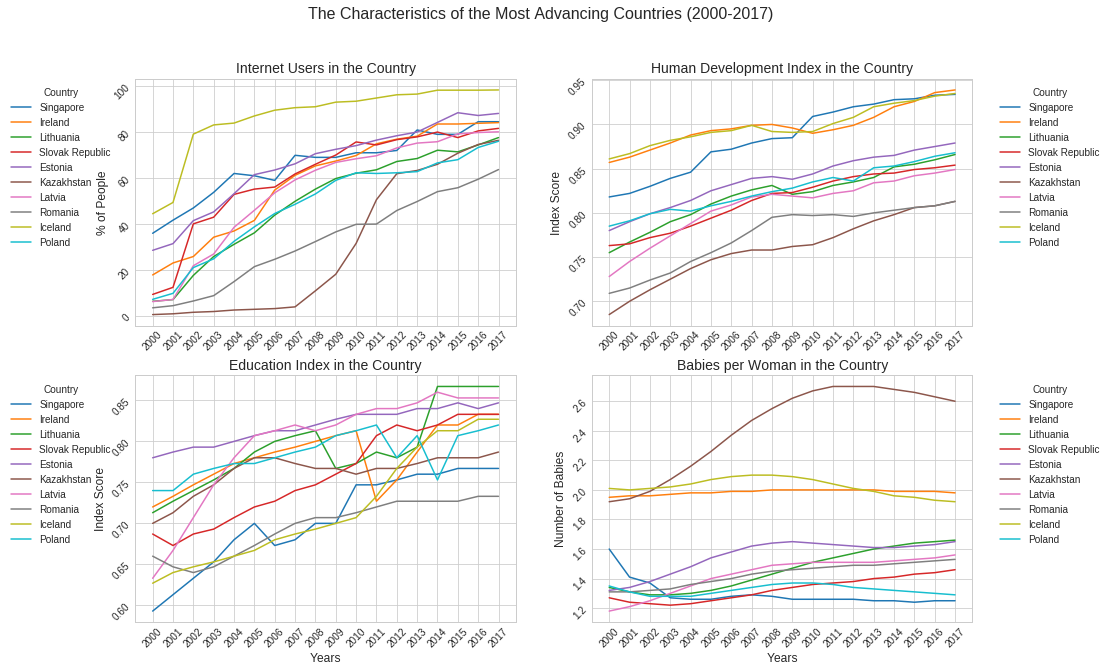

In [124]:
plot_features(most_advancing_10)

In [126]:
most_advancing_10.sort_values('end')

,difference,start,end,change %
0,,,,
Romania,13000,10400,23400,0.555556
Kazakhstan,14150,9950,24100,0.587137
Latvia,13800,11200,25000,0.552000
Poland,12600,14700,27300,0.461538
Lithuania,17400,12200,29600,0.587838
Estonia,14200,15700,29900,0.474916
Slovak Republic,14500,15600,30100,0.481728
Iceland,12800,35000,47800,0.267782
Ireland,27200,39400,66600,0.408408


According to the plots all these countries are very similar in the first 3 indicators:
- Over the years their scores increases in number of interent users, education and human development index.
- Although their ending points differes we can still see that they have good scores
 - we can see that the top 3 countries in Human Development are **Singapore, Ireland and Iceland**. This can easly be explained as they did have a higher starting and ending GDP/Capita than other countries on the list.
 - We can also see that most of these countries have a really high percentage of their people using the internet.
 - And most of them also have a very high educational index
 
- For the Fertility indicator
 - We can see that most of the countries are below **1.6**
 - They are all below 2.0 except for **Kazakhstan** which is the country with the second to lowest ending GDP/Capita but we can't say that the fertility rate is the final indicator on country's development as **Romania** has a lowe Fertility rates but still has the lowest GDP/Capita.
 - **But we can say that most of the most advancing countries has a low fertility rate**.
 
**- One more question we can ask now: does these countries have higher educational index or other index because they have a higher GDP/Capita or they have a higher GDP/Capita because they have a higher educational index?**

###  3.Do these countries have higher educational index or other index because they have a higher GDP/Capita or they have a higher GDP/Capita because they have a higher educational index?
To answer this question we will have to answer the 2 questions within and then we will reach our conclusion. I will be answering these questions using the ending points (2017) in our data as it is the closest to our time and would be more accurate.

#### Does countries with higher education index have higher income?

In [237]:
# getting the countries with the highest education in 2017
df_owid[df_owid['year'] == 2017].sort_values(by=148, axis=1, ascending=False)

,year,Germany,Switzerland,United States,Canada,Lithuania,Israel,Australia,United Kingdom,Latvia,...,Senegal,Guinea-Bissau,Burundi,Yemen,Ethiopia,Guinea,Chad,Mali,Niger,Burkina Faso
148,2017,0.94,0.893,0.893,0.887,0.867,0.867,0.86,0.86,0.853,...,0.2,0.2,0.2,0.2,0.18,0.173,0.153,0.153,0.133,0.1


In [238]:
# the top 5 countries according to the educational index in 2017
highest_education = ['Germany', 'United States', 'Switzerland', 'Canada', 'Lithuania']
# getting only the data for these countries
highest_education_scores = df_owid[df_owid['year'] == 2017][highest_education]

In [240]:
# getting the top 10% threshold in the eductional index
highest_education_scores['top 10'] = df_owid[df_owid['year'] == 2017].drop('year', axis=1).quantile(.90, axis=1)
highest_education_scores

,Germany,United States,Switzerland,Canada,Lithuania,top 10
148,0.94,0.893,0.893,0.887,0.867,0.8294


Here we are comparing the countries educational scores to say if they are among the top 10% of the scores in 2017 or not.

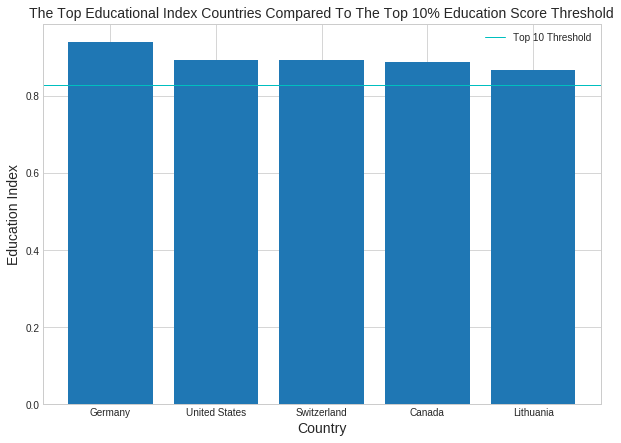

In [250]:
plt.figure(figsize=(10, 7))
plt.bar(highest_education_scores.columns[:-1], highest_education_scores.iloc[0, :-1])
plt.axhline(y=highest_education_scores.iloc[0, -1],linewidth=1, color='c', label='Top 10 Threshold')
plt.legend()
plt.title('The Top Educational Index Countries Compared To The Top 10% Education Score Threshold', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Education Index', fontsize=14)
plt.show()

This shows the top 5 countries in educational score compared to the top 10 percent threshold. We will use it to compare results in the comming cells.

In [251]:
# now getting the GDP/Capita to of these countries
highest_education_income_scores = df_income[df_income['year'] == 2017][highest_education]

In [252]:
# getting the top 10% income threshold
highest_education_income_scores['top 10'] = df_income[df_income['year'] == 2017].drop('year', axis=1).quantile(.90, axis=1)

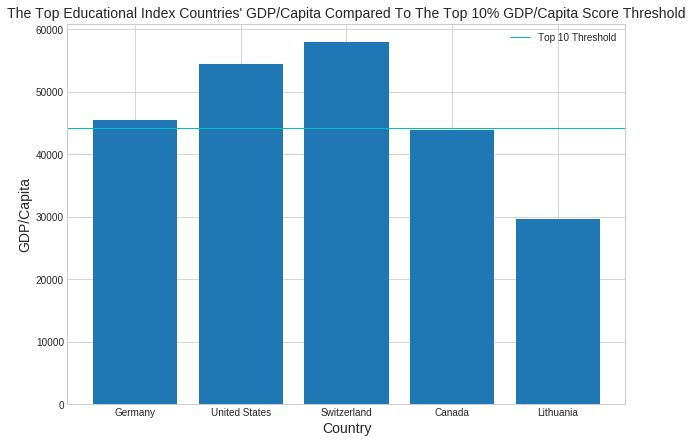

In [262]:
plt.figure(figsize=(10, 7))
plt.bar(highest_education_income_scores.columns[:-1], highest_education_income_scores.iloc[0, :-1])
plt.axhline(y=highest_education_income_scores.iloc[0, -1],linewidth=1, color='c', label='Top 10 Threshold')
plt.legend()
plt.title("The Top Educational Index Countries' GDP/Capita Compared To The Top 10% GDP/Capita Score Threshold", fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.ylabel('GDP/Capita', fontsize=14)
plt.show()

**We can see that nearly all of the countries with the top educational scores have a really high GDP/Capita and they are among the top 10% except for Lithuania which still has a really high GDP/Capita but not in the top 10%.**

now to the other question.

#### Does countries with higher income index have higher education index?

In [254]:
# getting the countries with the highest GDP/Capita in 2017
df_income[df_income['year'] == 2017].sort_values(by=218, axis=1, ascending=False)

,Qatar,Luxembourg,Singapore,Brunei,United Arab Emirates,Ireland,Kuwait,Norway,Switzerland,United States,...,Madagascar,Sierra Leone,Eritrea,Liberia,Mozambique,Malawi,Niger,"Congo, Dem. Rep.",Central African Republic,Burundi
218,113000,93100,87800,72500,66700,66600,66000,65000,58000,54500,...,1420,1400,1250,1180,1180,1150,921,808,754,671


In [255]:
# the top 5 countires according to the GDP/Capita in 2017 
highest_income = ['Qatar', 'Luxembourg', 'Singapore', 'Brunei', 'United Arab Emirates']
# getting the scores for only these countries
highest_income_scores = df_income[df_income['year'] == 2017][highest_income]
highest_income_scores

,Qatar,Luxembourg,Singapore,Brunei,United Arab Emirates
218,113000,93100,87800,72500,66700


In [256]:
# getting the top 10% threshold in the GDP/Capita
highest_income_scores['median'] = df_income[df_income['year'] == 2017].drop('year', axis=1).quantile(.90, axis=1)
highest_education_scores

,Germany,United States,Switzerland,Canada,Lithuania,top 10
148,0.94,0.893,0.893,0.887,0.867,0.8294


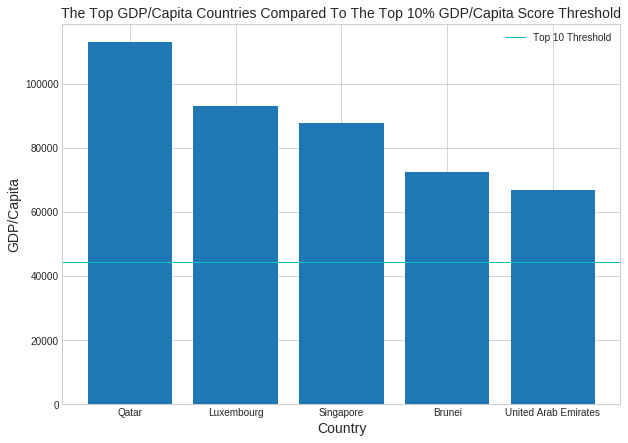

In [257]:
plt.figure(figsize=(10, 7))
plt.bar(highest_income_scores.columns[:-1], highest_income_scores.iloc[0, :-1])
plt.axhline(y=highest_income_scores.iloc[0, -1],linewidth=1, color='c', label='Top 10 Threshold')
plt.legend()
plt.title('The Top GDP/Capita Countries Compared To The Top 10% GDP/Capita Score Threshold', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.ylabel('GDP/Capita', fontsize=14)
plt.show()

This shows the top 5 countries in GDP/Capita compared to the top 10 percent threshold. We will use it to compare results in the comming cells.

In [258]:
# now getting the education index for these countries
highest_income_edu_scores = df_owid[df_owid['year'] == 2017][highest_income]
# adding the top 10% education index threshold
highest_income_edu_scores['top 10'] = df_owid[df_owid['year'] == 2017].drop('year', axis=1).quantile(.90, axis=1)
highest_income_edu_scores

,Qatar,Luxembourg,Singapore,Brunei,United Arab Emirates,top 10
148,0.653,0.807,0.767,0.607,0.72,0.8294


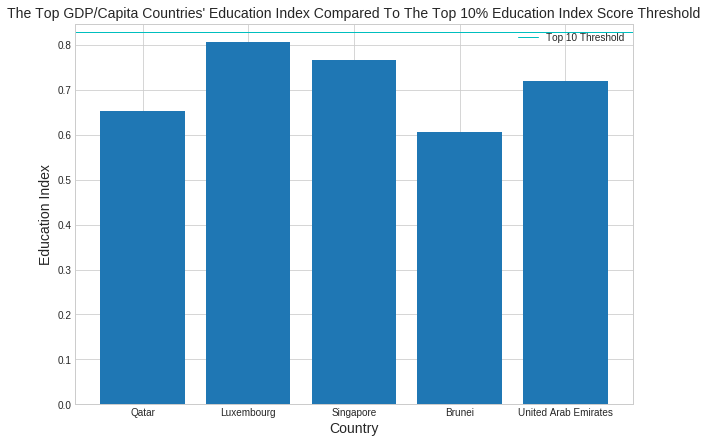

In [264]:
plt.figure(figsize=(10, 7))
plt.bar(highest_income_edu_scores.columns[:-1], highest_income_edu_scores.iloc[0, :-1])
plt.axhline(y=highest_income_edu_scores.iloc[0, -1],linewidth=1, color='c', label='Top 10 Threshold')
plt.legend()
plt.title("The Top GDP/Capita Countries' Education Index Compared To The Top 10% Education Index Score Threshold", fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Education Index', fontsize=14)
plt.show()

**Although these countries have the highest GDP/Capita, they still are not in the top 10% when it comes to the Education Index. But they still have a relatively high Education Index.**

The answer to our question *Do these countries have higher educational index or other index because they have a higher GDP/Capita or they have a higher GDP/Capita because they have a higher educational index?*

**We can say that having a really high Education Index can guarantee you to have a really high GDP/Capita even among the top 10% But having the highest GDP/Capita can't guarantee you to have the highest Education Index top 10% but still can get you a relatively high score to be among the top countries.**

## Conclusions <a id='conclusions'></a>

### Which countries has developed the most (GDP / Capita) in the choosen time period (2000 - 2017)?
 - Singapore, Ireland, Lithuania, Slovak Republic, Estonia,
       Kazakhstan, Latvia, Romania, Iceland, Poland
![q1](q1.png)
       
### What are the characteristics of these countries that has developed the most in the time period?
- Over the years in the time period:  
 - Increasing Number of Internet Users.
 - Increasing Educational Index.
 - Increasing Human Development Index.
 - Lower Fertility rates below 2.0 and sometime below 1.6 except for Kazakhstan
![q2](q2.png)

### Do these countries have higher educational index or other index because they have a higher GDP/Capita or they have a higher GDP/Capita because they have a higher educational index?
- Having a really high Education Index can guarantee you to have a really high GDP/Capita even among the top 10% But having the highest GDP/Capita can't guarantee you to have the highest Education Index top 10% but still can get you a relatively high score to be among the top countries.

Countries with the highest Education Index             |  Countries with the highest GDP/Capita
:-------------------------:|:-------------------------:
![q3p1](q3p1.png) | ![q3p2](q3p2.png)